# Q1: Importing Libraries/Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# setting max columns to none. All columns should be visible
pd.set_option('display.max_columns', None)


## Importing Data

In [3]:
path = r'C:\Users\david\04-06-2024 Instacart Basket Analysis'

In [4]:
ords_prods_customers = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_customers.pkl'))

In [5]:
ords_prods_customers.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_ordinal_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,0,0,2539329,1,1,2,8,NaN,True,196,1,0,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,1,1,2398795,1,2,3,7,15.0,False,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy days,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2,2,473747,1,3,3,12,21.0,False,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy days,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,3,3,2254736,1,4,4,7,29.0,False,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy days,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,4,4,431534,1,5,4,15,28.0,False,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy days,Most orders - Top 5 Hours,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
# data check - correct number of rows
ords_prods_customers.shape

(32404859, 36)

# Q2: Removing Personal Identifiable Information

In [7]:
# removing first and last name, as it is PII and not needed for the analysis. Also deleted two junk columns
ords_prods_customers.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0_x', 'first_name', 'surname'], inplace = True)

In [8]:
ords_prods_customers.head()

,order_id,user_id,order_ordinal_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy days,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy days,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy days,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy days,Most orders - Top 5 Hours,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


# Q3: Seperating users into regions

In [9]:
# Creates 4 seperate lists of states, and then determines which list the given row belongs in.
West = ['Washington', 'Oregon', 'California', 'Idaho', 'Nevada', 'Montana', 'Wyoming', 'Utah', 'Arizona', 'New Mexico', 'Colorado', 'Alaska', 'Hawaii']

In [10]:
Midwest = ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri', 'Wisconsin', 'Illinois', 'Indiana', 'Michigan', 'Ohio']

In [11]:
South = ['Texas', 'Oklahoma', 'Arkansas', 'Louisiana', 'Mississippi', 'Alabama', 'Georgia', 'South Carolina', 'Florida', 'Tennessee', 'Kentucky', 'West Virginia', 'Virginia', 'Maryland', 'Delaware', 'District of Columbia', 'North Carolina']

In [12]:
NorthEast = ['Pennsylvania', 'New York', 'New Jersey', 'Connecticut', 'Vermont', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Maine']

In [13]:
def find_region(row):
    if row['state'] in West:
        return 'West'
    elif row['state'] in Midwest:
        return 'Midwest'
    elif row['state'] in South:
        return 'South'
    elif row['state'] in NorthEast:
        return 'North East'
    else:
        return 'Error'
    

In [14]:
ords_prods_customers['region'] = ords_prods_customers.apply(find_region, axis = 1)

In [15]:
ords_prods_customers.head()

,order_id,user_id,order_ordinal_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region
0,2539329,1,1,2,8,NaN,True,196,1,0,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,False,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy days,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,3,3,12,21.0,False,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy days,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,False,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy days,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,431534,1,5,4,15,28.0,False,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy days,Most orders - Top 5 Hours,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [16]:
ords_prods_customers.value_counts('region')

region
South         10791885
West           8292913
Midwest        7597325
North East     5722736
Name: count, dtype: int64

In [17]:
ords_prods_customers.head()

,order_id,user_id,order_ordinal_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region
0,2539329,1,1,2,8,NaN,True,196,1,0,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,False,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy days,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,3,3,12,21.0,False,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy days,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,False,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy days,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,431534,1,5,4,15,28.0,False,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy days,Most orders - Top 5 Hours,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


## Regional spending distribution

In [18]:
pivot_table = ords_prods_customers.pivot_table(index = 'region', columns = 'spending_flag', aggfunc = 'size', fill_value = 0)

In [19]:
pivot_table

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
North East,108225,5614511
South,209691,10582194
West,160354,8132559


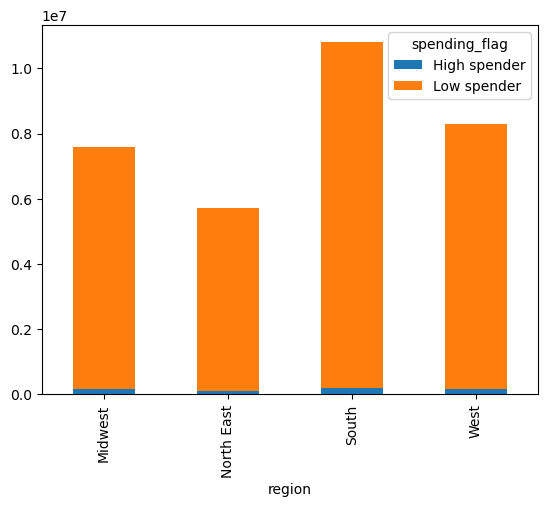

In [20]:
spending_flag_bar = pivot_table.plot(kind='bar',stacked = True)

The Southern region has the most customers overall. Low-spenders make up the majority of all customers.

In [76]:
# export bar chart
spending_flag_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'spending_by_region_bar.png'))

# Q4: Creating exclusion flag for low activity customers

In [21]:
ords_prods_customers_low_activity_removed = ords_prods_customers[ords_prods_customers['max_order'] > 5]  

In [22]:
ords_prods_customers_low_activity_removed.shape

(30171424, 33)

In [23]:
2233435 + 30171424

32404859

In [24]:
# exporting new filtered dataset
ords_prods_customers_low_activity_removed.to_pickle(os.path.join(path,'Data','Prepared Data', 'ords_prods_customers_low_activity_removed.pkl'))

# Q5: Customer Profiling

In [25]:
# renaming merged database for ease.
df = ords_prods_customers_low_activity_removed

## Profiling Customers by Age

In [26]:
df.loc[df['age']<=25, 'age_group']='Young Adult'
df.loc[(df['age']<65)&(df['age']>25), 'age_group']='Adult'
df.loc[df['age']>=65, 'age_group']='Senior'

C:\Users\david\AppData\Local\Temp\ipykernel_13856\879315498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['age']<=25, 'age_group']='Young Adult'


In [27]:
# mostly adults, followed by seniors
df['age_group'].value_counts()

age_group
Adult          18417604
Senior          7989725
Young Adult     3764095
Name: count, dtype: int64

##  Profiling by Number of Dependents

In [28]:
# creates flag variable based on if they have at least one dependent
df.loc[df['n_dependants'] > 0, 'has_dependents']= 'True'
df.loc[df['n_dependants'] == 0, 'has_dependents']= 'False'


C:\Users\david\AppData\Local\Temp\ipykernel_13856\2437897088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['n_dependants'] > 0, 'has_dependents']= 'True'


In [29]:
df.value_counts('has_dependents')

has_dependents
True     22632211
False     7539213
Name: count, dtype: int64

## Profiling by Income

In [30]:
df.loc[df['income'] <= 50000, 'income_group'] = 'Low Income'
df.loc[(df['income'] > 50000) & (df['income'] <= 100000), 'income_group'] = 'Middle Income'
df.loc[df['income'] > 100000, 'income_group'] = 'High Income'

C:\Users\david\AppData\Local\Temp\ipykernel_13856\274179604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['income'] <= 50000, 'income_group'] = 'Low Income'


In [31]:
df.value_counts('income_group')

income_group
High Income      13863645
Middle Income    13058945
Low Income        3248834
Name: count, dtype: int64

# Q6: Visualizations

## Age Groups Visualization

In [32]:
# creates a new df with the counts of all age groups, then a pie chart is made.
age_group_counts = df['age_group'].value_counts()

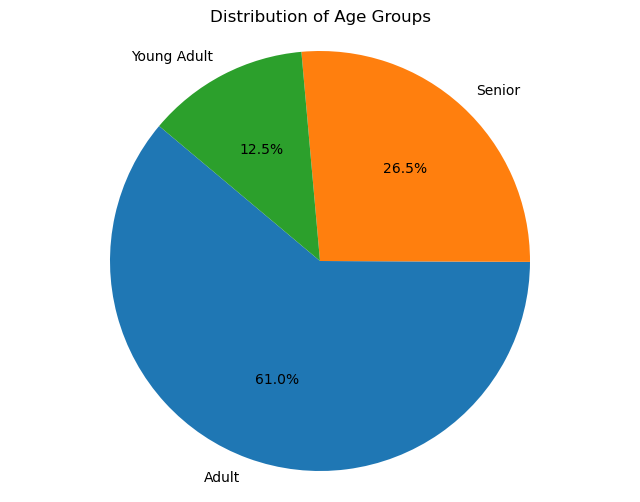

In [79]:
pie1 = plt.figure(figsize=(8, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age Groups')
plt.axis('equal')
plt.show()

In [80]:
pie1.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_groups_pie.png'))

## Number of Dependents Visualization

In [34]:
has_dependents_counts = df['has_dependents'].value_counts()

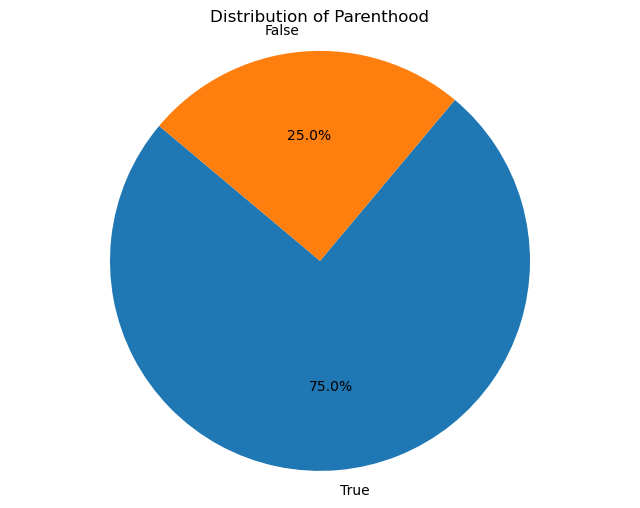

In [81]:
pie2 = plt.figure(figsize=(8, 6))
plt.pie(has_dependents_counts, labels=has_dependents_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Parenthood')
plt.axis('equal')
plt.show()

In [82]:
pie2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dependents_pie.png'))

## Income Distribution Visualization

In [36]:
income_group_counts = df['income_group'].value_counts()

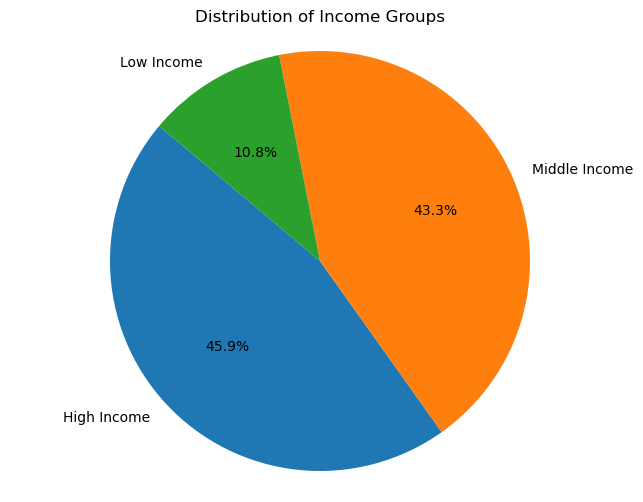

In [83]:
pie3 = plt.figure(figsize=(8, 6))
plt.pie(income_group_counts, labels=income_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Income Groups')
plt.axis('equal')
plt.show()

In [84]:
pie3.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'income_pie.png'))

# Q7: Aggregating Max, Mean, and Min of frequency and expenditure for customer profiles

## Age Aggregations

In [38]:
# max, min, mean by age category
aggregations_by_age = df.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 'prices' : ['min', 'mean', 'max']})
aggregations_by_age

days_since_prior_order                  prices                    
                               min       mean   max    min       mean      max
age_group                                                                     
Adult                          0.0  10.642169  30.0    1.0  11.882920  99999.0
Senior                         0.0  10.618772  30.0    1.0  11.683091  99999.0
Young Adult                    0.0  10.623093  30.0    1.0  12.107390  99999.0

Each age group had a similar average number of days between ordering groceries. Seniors spent the least per item, while young adults spent the most.

## Income Aggregations

In [39]:
aggregations_by_income = df.groupby('income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 'prices' : ['min', 'mean', 'max']})
aggregations_by_income

days_since_prior_order                  prices             \
                                 min       mean   max    min       mean   
income_group                                                              
High Income                      0.0  10.602607  30.0    1.0  16.279241   
Low Income                       0.0  10.943486  30.0    1.0   6.711410   
Middle Income                    0.0  10.589683  30.0    1.0   8.444716   

                        
                   max  
income_group            
High Income    99999.0  
Low Income        25.0  
Middle Income  99999.0

People in the high income bracket spent the most money per item. Even though people in the low income bracket spent less per item, they shopped more often than those in the high income bracket.

## Number of Dependents Aggregations

In [40]:
aggregations_by_dependents = df.groupby('has_dependents').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 'prices' : ['min', 'mean', 'max']})
aggregations_by_dependents

days_since_prior_order                  prices             \
                                  min       mean   max    min       mean   
has_dependents                                                             
False                             0.0  10.610151  30.0    1.0  12.081944   
True                              0.0  10.641405  30.0    1.0  11.783410   

                         
                    max  
has_dependents           
False           99999.0  
True            99999.0

There wasn't much of a difference between the two groups. People with dependents didn't seem to spend significantly more or less than those without dependents. Similarly, there wasn't a significant difference in how often they ordered groceries.

# Q8: Comparing customer profiles with regions and departments

## Importing department data

In [46]:
department_df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'))

In [47]:
department_df

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [48]:
department_df.rename(columns = {'Unnamed: 0': 'department_id'}, inplace = True)

In [49]:
department_df

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [50]:
merged_df = pd.merge(df, department_df, on='department_id')

In [51]:
df.shape

(30171424, 36)

In [52]:
merged_df.shape

(30171424, 37)

In [53]:
merged_df.head()

,order_id,user_id,order_ordinal_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,age_group,has_dependents,income_group,department
0,2539329,1,1,2,8,NaN,True,196,1,0,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Adult,True,Low Income,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy days,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Adult,True,Low Income,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy days,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Adult,True,Low Income,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy days,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Adult,True,Low Income,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy days,Most orders - Top 5 Hours,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Adult,True,Low Income,beverages


## Departments by Region

In [54]:
region_dep = pd.crosstab(merged_df['department'], merged_df['region'], dropna = False)

In [55]:
region_dep

region,Midwest,North East,South,West
department,,,,
alcohol,32883,24114,47069,35507
babies,94027,71370,136961,100708
bakery,255082,194076,362204,281126
beverages,583228,451674,837788,634551
breakfast,151846,114701,217548,169324
bulk,7806,5482,10953,8600
canned goods,230173,171517,327746,252605
dairy eggs,1182974,892624,1682429,1295413
deli,228200,173837,325082,250931


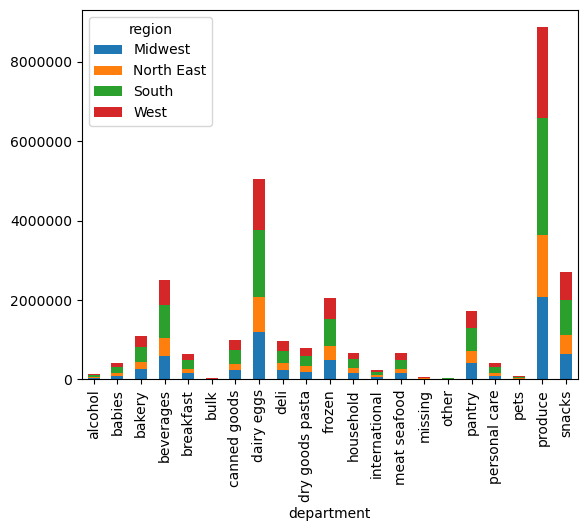

In [86]:
bar2 = region_dep.plot(kind='bar', stacked =True)
bar2.ticklabel_format(style='plain', axis='y')


In [87]:
bar2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'department_by_region_bar.png'))

## Age Group by Region

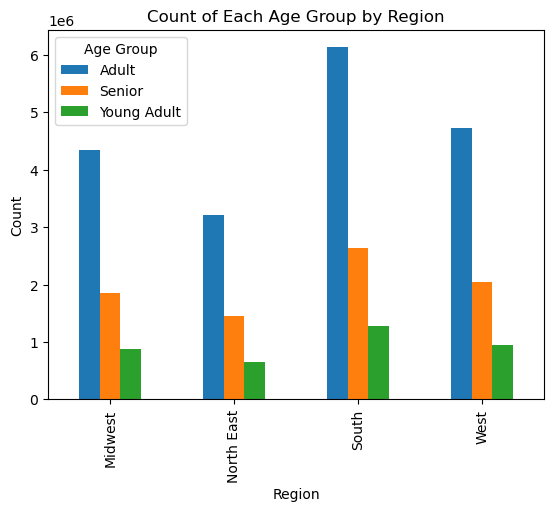

In [89]:
count_data = df.groupby(['region', 'age_group']).size().unstack(fill_value=0)
ax1 = count_data.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Count of Each Age Group by Region')
plt.legend(title='Age Group', loc='upper left')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

In [90]:
ax1.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_group_by_region_bar.png'))

In [42]:
cross_tab = pd.crosstab(df['age_group'], df['region'])
cross_tab

region,Midwest,North East,South,West
age_group,,,,
Adult,4341625,3216325,6127325,4732329
Senior,1852712,1447334,2641370,2048309
Young Adult,875785,660692,1281464,946154


In [59]:
crosstab = pd.crosstab(merged_df['age_group'], merged_df['department'])
crosstab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
Adult,85869,248534,667658,1529470,399348,19829,599898,3085460,598183,485512,1253170,413172,152074,397468,38092,20410,1057387,252746,53683,5408831,1650810
Senior,35266,104216,288610,667439,170859,8780,259659,1336003,258631,211025,548252,181050,65257,176134,16286,8666,458942,107730,24467,2350914,711539
Young Adult,18438,50316,136220,310332,83212,4232,122484,631977,121236,101146,257903,84073,31391,82127,8163,4339,215785,51331,12189,1100199,337002


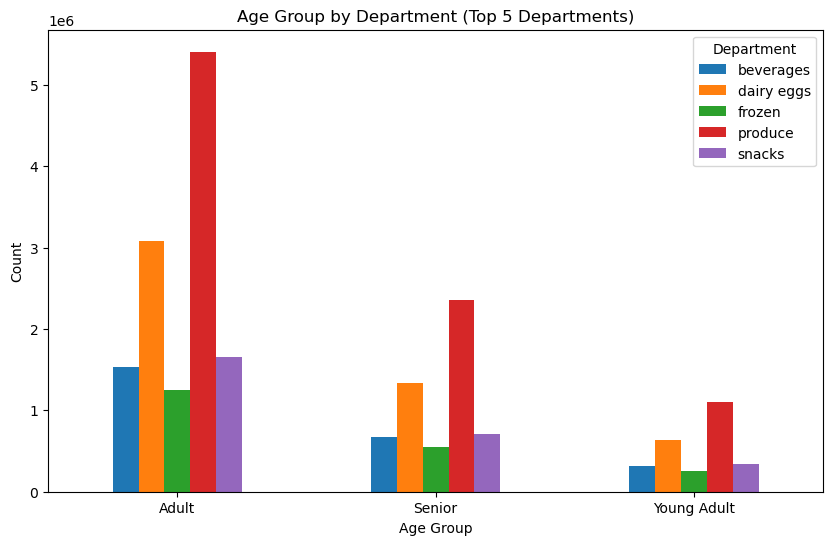

In [91]:
# finds top 5 departments, creates a crosstab, and makes a bar chart from that crosstab

top_departments = merged_df['department'].value_counts().nlargest(5).index
filtered_df = merged_df[merged_df['department'].isin(top_departments)]
crosstab = pd.crosstab(filtered_df['age_group'], filtered_df['department'])
crosstab.plot(kind='bar', figsize=(10, 6))
plt.title('Age Group by Department (Top 5 Departments)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Department')
plt.show()

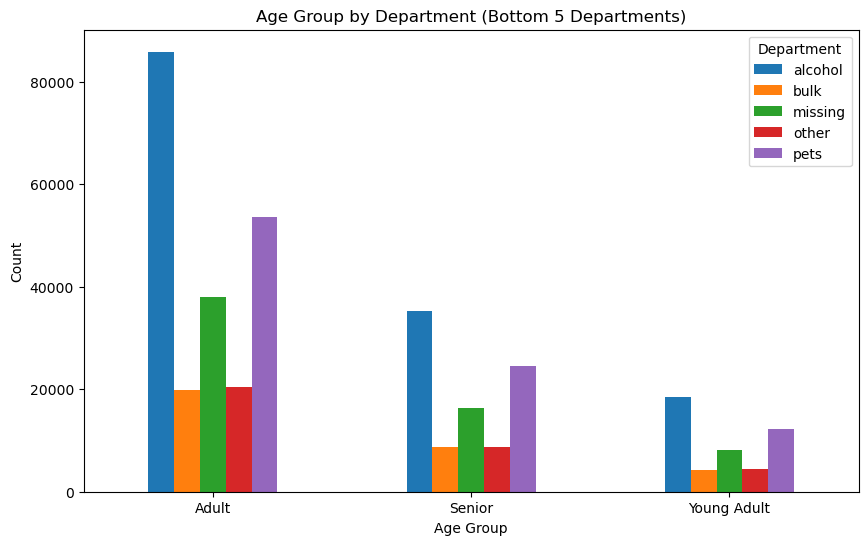

In [93]:
bottom_departments = merged_df['department'].value_counts().nsmallest(5).index
filtered_df = merged_df[merged_df['department'].isin(bottom_departments)]
crosstab = pd.crosstab(filtered_df['age_group'], filtered_df['department'])
bar3 = crosstab.plot(kind='bar', figsize=(10, 6))
plt.title('Age Group by Department (Bottom 5 Departments)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Department')
plt.show()

In [94]:
bar3.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_group_by_department.png'))

## Income Groups by Region

In [43]:
count_data = df.groupby(['region', 'income_group']).size().unstack(fill_value=0)

In [45]:
pd.crosstab(df['income_group'], df['region'], dropna = False)

region,Midwest,North East,South,West
income_group,,,,
High Income,3315516,2457212,4552410,3538507
Low Income,756646,565708,1105766,820714
Middle Income,2997960,2301431,4391983,3367571


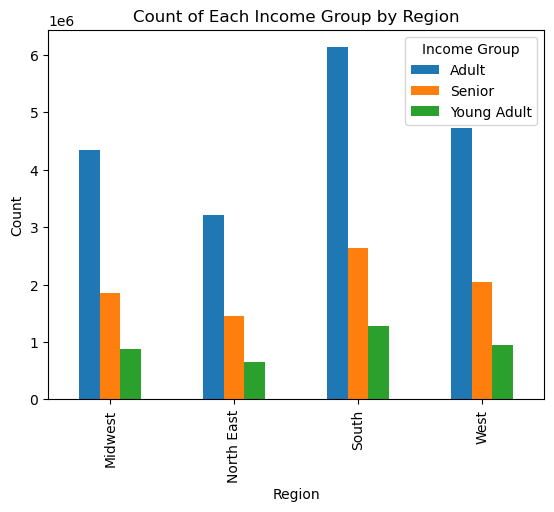

In [95]:
ax2 = count_data.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Count of Each Income Group by Region')
plt.legend(title='Income Group', bbox_to_anchor=(1, 1))
ax.ticklabel_format(style='plain', axis='y')
plt.show()

In [96]:
ax2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'income_by_region_bar.png'))

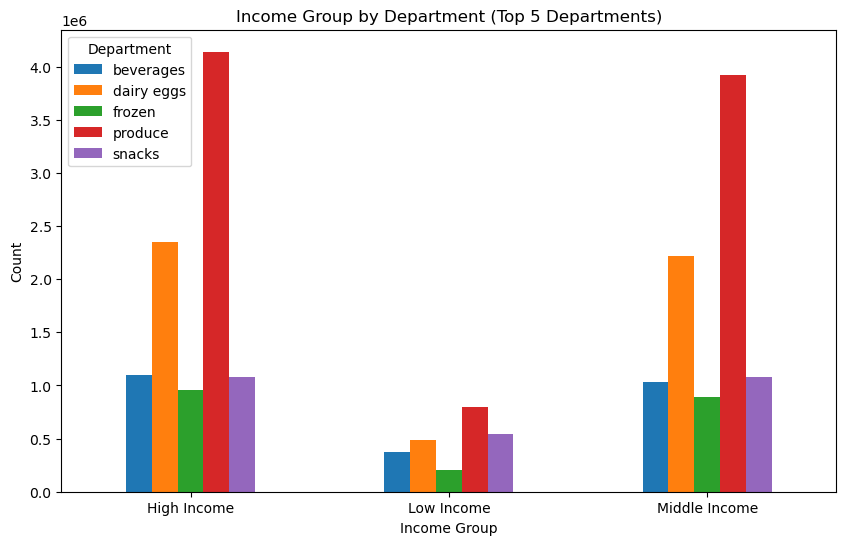

In [68]:
top_departments = merged_df['department'].value_counts().nlargest(5).index
filtered_df = merged_df[merged_df['department'].isin(top_departments)]
crosstab = pd.crosstab(filtered_df['income_group'], filtered_df['department'])
bar5 = crosstab.plot(kind='bar', figsize=(10, 6))
plt.title('Income Group by Department (Top 5 Departments)')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Department')
plt.show()

In [101]:
bar5.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'income_by_top_department_bar.png'))

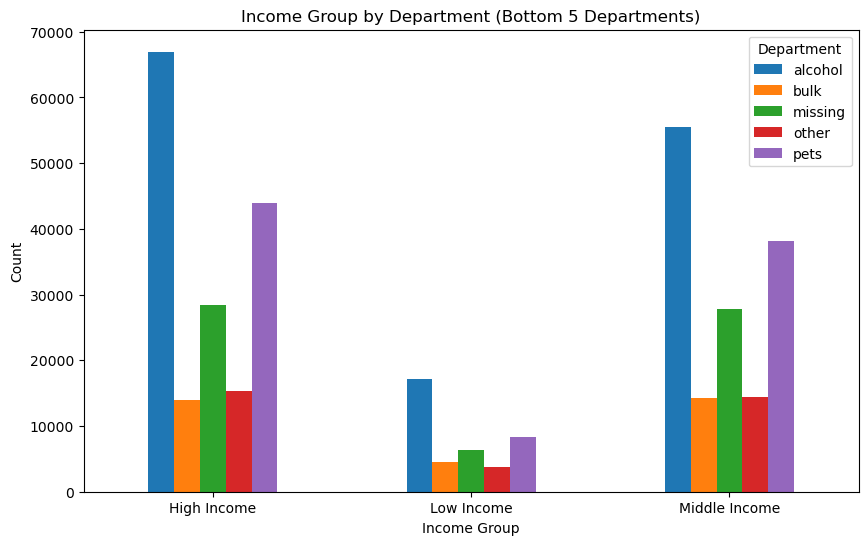

In [98]:
bottom_departments = merged_df['department'].value_counts().nsmallest(5).index
filtered_df = merged_df[merged_df['department'].isin(bottom_departments)]
crosstab = pd.crosstab(filtered_df['income_group'], filtered_df['department'])
bar6 = crosstab.plot(kind='bar', figsize=(10, 6))
plt.title('Income Group by Department (Bottom 5 Departments)')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Department')
plt.show()

In [100]:
bar6.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'income_by_bottom_department_bar.png'))

## Number of Dependents by Region and Department

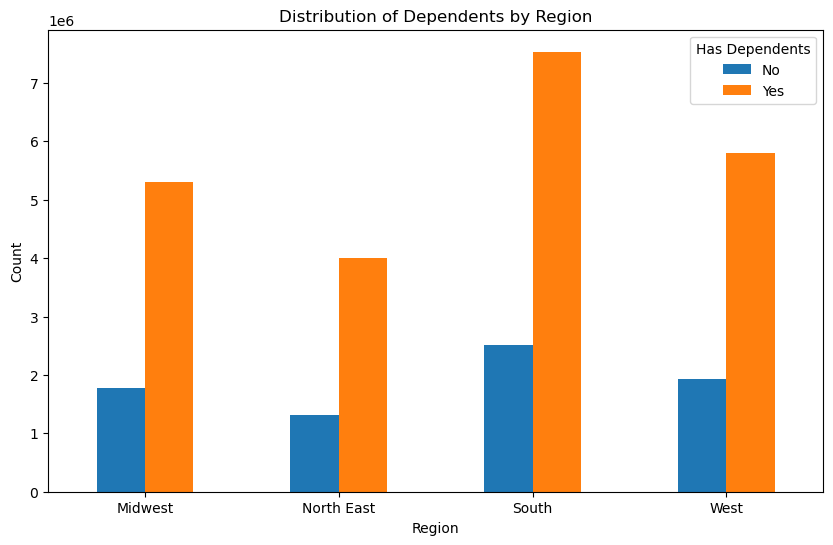

In [102]:
crosstab = pd.crosstab(merged_df['region'], merged_df['has_dependents'])
bar7 = crosstab.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Dependents by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Has Dependents', labels=['No', 'Yes'])
plt.show()

In [103]:
bar7.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dependents_by_region_bar.png'))

In [72]:
crosstab

has_dependents,False,True
region,,
Midwest,1773970,5296152
North East,1317139,4007212
South,2516780,7533379
West,1931324,5795468


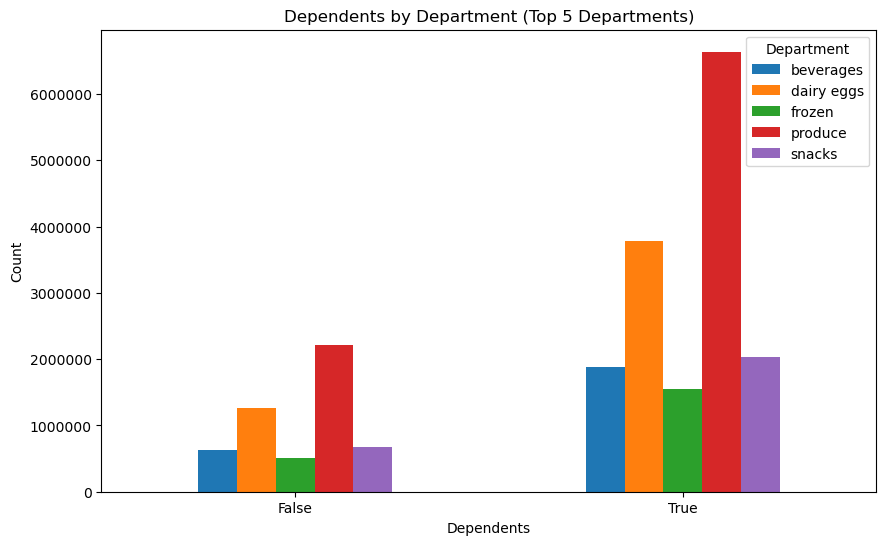

In [104]:
top_departments = merged_df['department'].value_counts().nlargest(5).index
filtered_df = merged_df[merged_df['department'].isin(top_departments)]
crosstab = pd.crosstab(filtered_df['has_dependents'], filtered_df['department'])
bar8 = crosstab.plot(kind='bar', figsize=(10, 6))
plt.title('Dependents by Department (Top 5 Departments)')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Department')
bar8.ticklabel_format(style='plain', axis='y')
plt.show()

In [105]:
bar8.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dependents_by_department_top.png'))

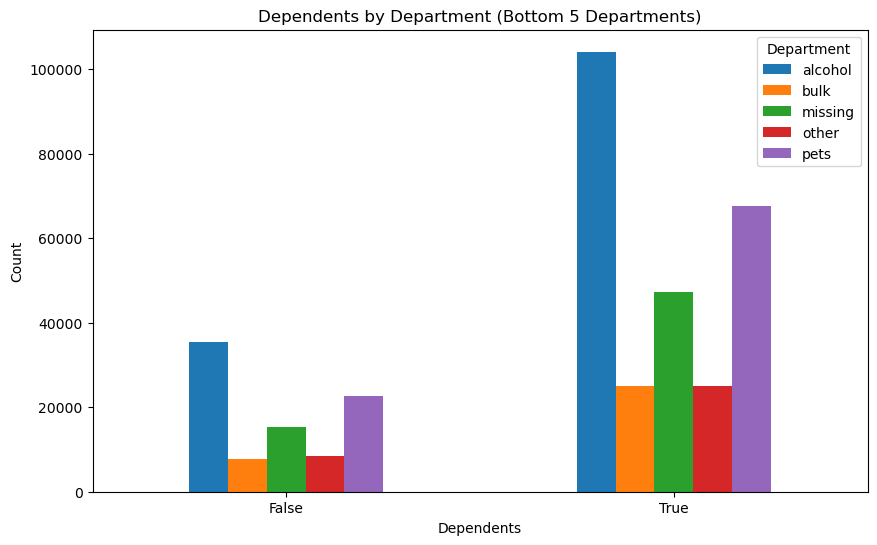

In [106]:
bottom_departments = merged_df['department'].value_counts().nsmallest(5).index
filtered_df = merged_df[merged_df['department'].isin(bottom_departments)]
crosstab = pd.crosstab(filtered_df['has_dependents'], filtered_df['department'])
bar9 = crosstab.plot(kind='bar', figsize=(10, 6))
plt.title('Dependents by Department (Bottom 5 Departments)')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Department')
plt.show()

In [107]:
bar9.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dependents_by_department_bottom.png'))

# Bonus Visualizations

Text(0, 0.5, 'Frequency')

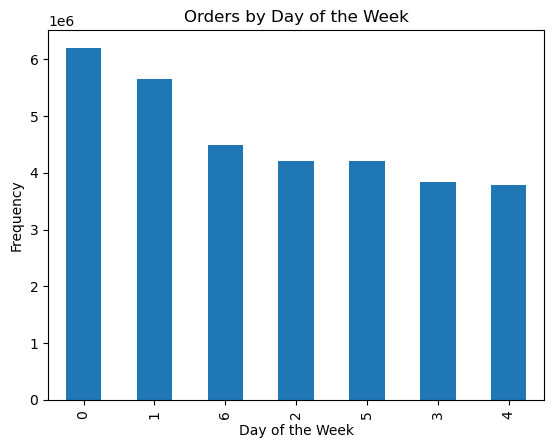

In [7]:
bar10 = ords_prods_customers['order_day_of_week'].value_counts().plot.bar()
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')